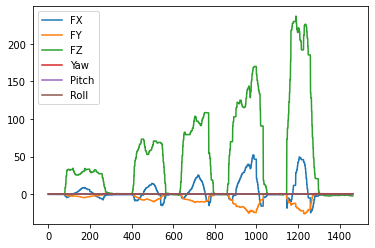

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_muleta = pd.read_csv('teste_y_0.csv')

df_muleta.plot()

plt.show()

In [2]:
df_muleta

,FX,FY,FZ,Yaw,Pitch,Roll
0,-0.272503,0.184817,0.190396,0.317820,-0.256074,0.057165
1,-0.272503,0.184817,0.190396,0.318785,-0.256388,0.056485
2,-0.333730,0.170113,0.245643,0.322857,-0.256276,0.055223
3,-0.333730,0.170113,0.245643,0.324718,-0.256424,0.054836
4,-0.333730,0.170113,0.245643,0.325817,-0.256655,0.055182
...,...,...,...,...,...,...
1459,0.369548,0.497248,-2.327486,0.556409,-0.332312,0.059118
1460,0.369548,0.497248,-2.327486,0.561862,-0.327735,0.061437
1461,0.277800,0.487498,-2.358831,0.560717,-0.327363,0.061308
1462,0.277800,0.487498,-2.358831,0.563677,-0.329750,0.059871


In [15]:
%matplotlib tk
import pandas as pd
import matplotlib.pyplot as plt

df_plataforma = pd.read_csv('teste 1.csv', sep=';',decimal=',',skiprows=3)
df_plataforma = df_plataforma.rolling(1000).mean()
df_plataforma.dropna(inplace=True)
#df_plataforma.plot()

short = []
num = len(df_muleta)
passo = int(len(df_plataforma)/num)
for i in range(num):
    short.append(df_plataforma['V.2'][i*passo:(i+1)*passo].mean())
df_short = pd.DataFrame(data=short,columns=['FZ']).dropna()
df_short.plot()
plt.show()

In [16]:
df_short

,FZ
0,8.040960
1,8.442937
2,6.848889
3,7.223765
4,8.163228
...,...
1459,9.270049
1460,9.208191
1461,9.448915
1462,9.239685


In [5]:
import numpy as np
import pandas as pd
#import streamlit as st
import plotly.express as px
from sklearn.metrics import r2_score
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

x = np.array((df_muleta['FZ']).fillna(0))
#y = np.array((df_plataforma['V.2']).fillna(0))
y = np.array((df_short['FZ']).fillna(0))
distance, path = fastdtw(x, y, dist=euclidean)

In [17]:
from dtw import *

x = np.array((df_muleta['FZ']).fillna(0))
#y = np.array((df_plataforma['V.2']).fillna(0))
y = np.array((df_short['FZ']).fillna(0))

alignment = dtw(x,y,keep_internals=True)
alignment.plot(type="threeway")

<AxesSubplot:>

In [26]:
plt.plot(x, label = "Muleta")
plt.plot(y[20:], label = "Plataforma")
plt.legend()
plt.show()

In [13]:
print(alignment.index1)
print(alignment.index2)

2788
2788


In [25]:
result = []
for i in range(0,len(path)):
    result.append([
    df_muleta['FZ'].iloc[path[i][0]],
    df_short['FZ'].iloc[path[i][1]]])
df_sync = pd.DataFrame(data=result,columns=['Fz Muleta','Fz Plataforma']).dropna()
#df_sync = df_sync.drop_duplicates(subset=['DateTime'])
#df_sync = df_sync.sort_values(by='DateTime')
df_sync = df_sync.reset_index(drop=True)

In [33]:
df_sync.plot()

<AxesSubplot:>

In [30]:
print(len(df_short))
print(len(df_muleta))
print(len(df_sync['Fz Muleta']))
print(len(df_sync['Fz Plataforma']))

1500
1464
2007
2007
